In [1]:
#import libraries yang di perlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

## Data Understanding

In [2]:
# membaca dataset
df = pd.read_csv("/Machine Learning/DATA/insurance.csv")

In [3]:
# menampilkan 5 kolom teratas
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# info tentang dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Persebaran dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# menampilkan jumlah baris dan kolom dataset
df.shape

(1338, 7)

In [7]:
# menampilkan nama - nama kolom di dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# EDA dan Data Visualization

In [8]:
# menghitung jumlah pria dan wanita
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

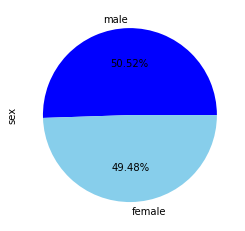

In [9]:
# menganalisa kolom "sex" mneggunakan "plot-pie"
plt.figure(figsize = (10,4))
df['sex'].value_counts().plot(kind = "pie", autopct = "%.2f%%", colors = ["blue", "Skyblue"])
plt.show()

In [10]:
# menghitung jumlah masing - masing umur
df["age"].value_counts()

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

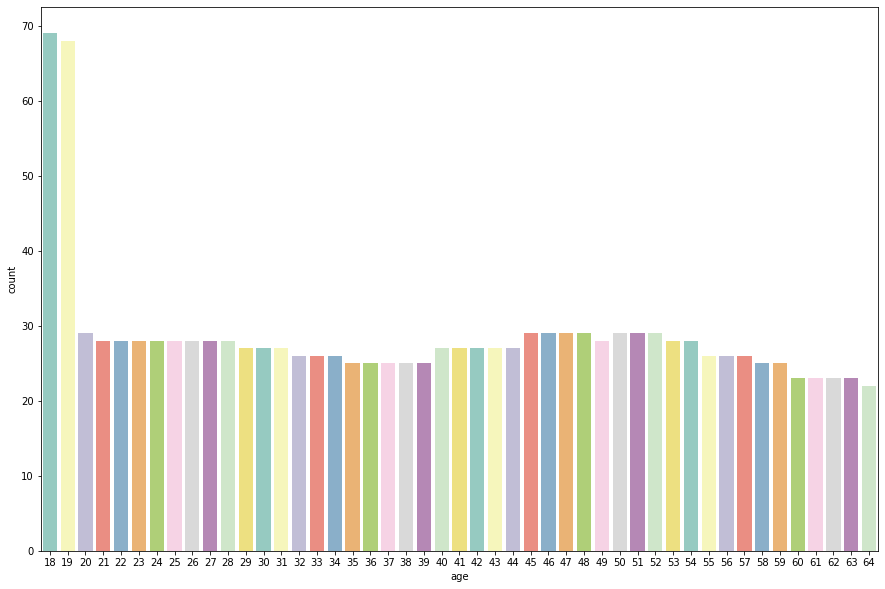

In [11]:
plt.figure(figsize = (15,10))
sns.countplot(df["age"],palette='Set3')
plt.show()

In [12]:
# menghitung jumlah bmi 
df['bmi'].value_counts()

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

<AxesSubplot:xlabel='bmi', ylabel='Density'>

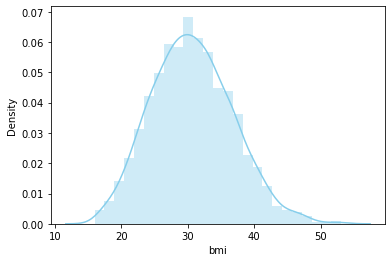

In [13]:
# Menganalisa menggunakan distplot
sns.distplot(df["bmi"], color = 'Skyblue')

In [14]:
# menghitung jumlah 'children'
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

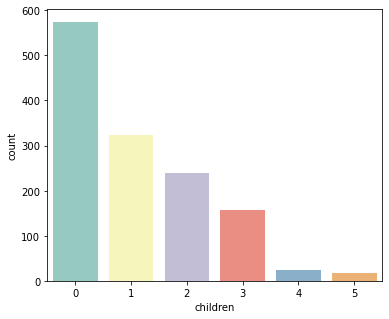

In [15]:
plt.figure(figsize=(6,5))
sns.countplot(x='children',data=df,palette='Set3')
plt.show()

In [16]:
# menghitung jumlah smoke or no smoke
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:ylabel='smoker'>

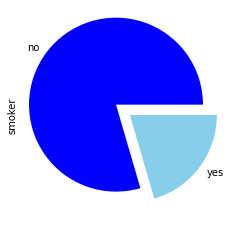

In [17]:
df["smoker"].value_counts().plot(kind="pie", explode=[0.2,0], colors = ["blue", "skyblue"])

<Figure size 720x288 with 0 Axes>

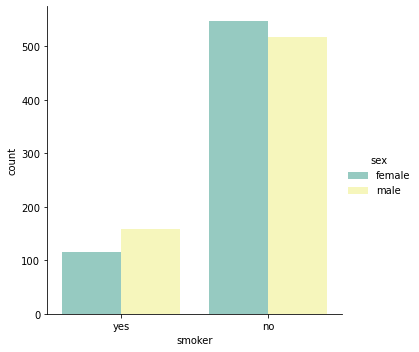

In [18]:
plt.figure(figsize = (10,4))
sns.catplot(data=df, x = "smoker", kind="count", hue="sex", palette='Set3')
plt.show()

In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

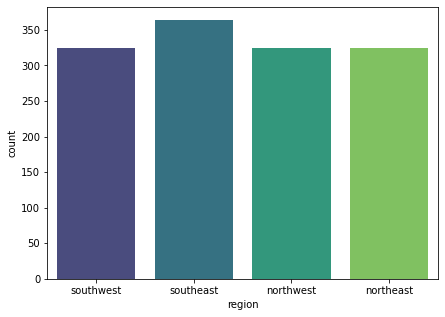

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='region',data=df,palette='viridis')
plt.show()

In [21]:
df["charges"].value_counts()

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

<AxesSubplot:xlabel='charges', ylabel='Density'>

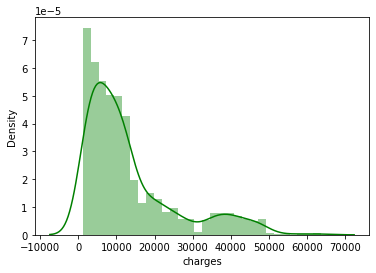

In [22]:
sns.distplot(df["charges"], color = "green")

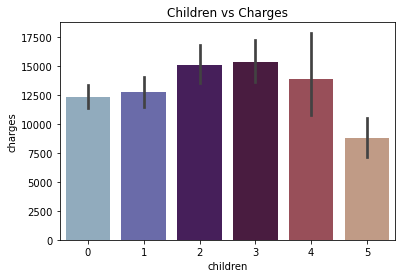

In [23]:
# menganalisa Dataset Children vs charges
sns.barplot(x=df.children,y=df.charges,palette='twilight').set(title="Children vs Charges")
plt.show()

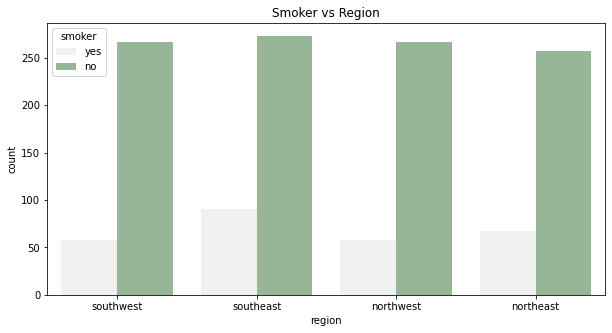

In [24]:
#menganalisa Smoker vs region
plt.figure(figsize=(10,5))
sns.countplot(x='region',hue='smoker',color='#92ba92',data=df).set(title="Smoker vs Region")
plt.show()


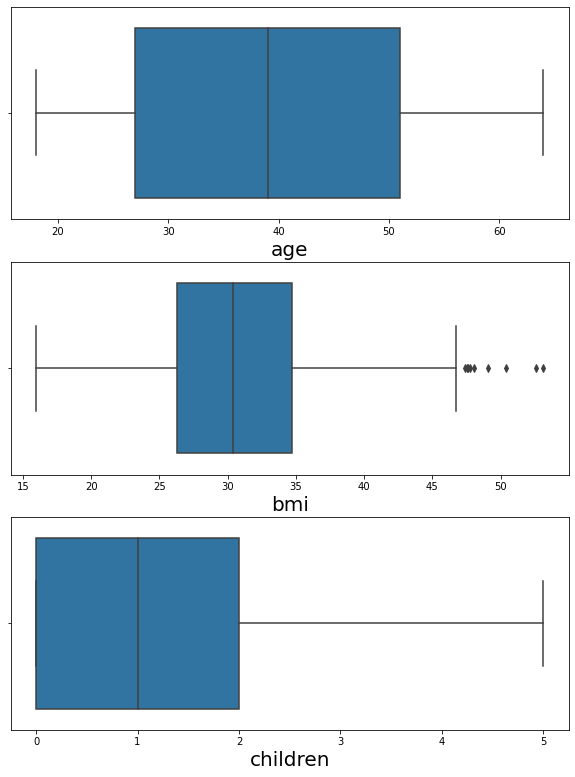

In [25]:
box=df[['age','bmi','children']]
plt.figure(figsize=(10,18), facecolor='white')
plotnumber = 1

for column in box:#acc
    if plotnumber<=6 : # ada 9 kolom dalam data
        ax = plt.subplot(4,1,plotnumber)#mengeplot 3 grapik
        sns.boxplot(x=box[column])#boxplot untuk memeriksa outlier
        plt.xlabel(column,fontsize=20)
    plotnumber+=1 
plt.show()

In [26]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

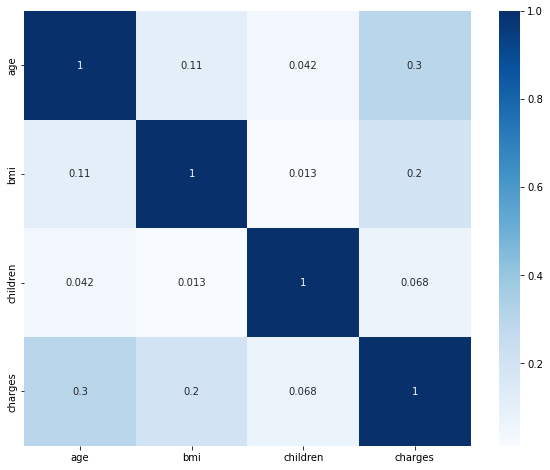

In [27]:
plt.figure(figsize = (10,8))
sns.heatmap(data = df.corr(), annot = True, cmap = "Blues")

## Data Preprocessing

In [28]:
# menampilkan missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
#mengubah setiap nilai dalam kolom menjadi angka yang berurutan.
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# smoker or not
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
#region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
#variabel independen
X=df.drop(['charges'],axis=1)
#variable dependen
y=df.charges

## Model 

In [32]:
# menginport library pembagi  dataset train dan test
from sklearn.model_selection import train_test_split

In [33]:
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [34]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(936, 6) (402, 6) (936,) (402,)


## LinearRegression

In [35]:
# menginport algoritma LinearRegression
from sklearn.linear_model import LinearRegression

In [36]:
lr = LinearRegression()

In [39]:
lr.fit(X_train,y_train)

LinearRegression()

In [40]:
x_train_predict = lr.predict(X_train)

In [41]:
x_train_predict

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

In [42]:
x_test_predict = lr.predict(X_test)

In [43]:
x_test_predict

array([11051.54909755,  9821.28110689, 37867.57220923, 16125.70579228,
        6920.27132517,  3879.38549816,  1448.91928088, 14390.17797974,
        9022.95151353,  7458.83371884,  4584.60125463, 10309.9886336 ,
        8693.03891958,  4085.25393494, 27551.60737718, 11151.0640722 ,
       11243.0536825 ,  5962.9521121 ,  8181.9015666 , 26750.7993431 ,
       33448.59842228, 14350.03320383, 11672.89478465, 32235.7832204 ,
        4326.07702625,  9096.53607025,  1045.25196369, 10177.76672094,
        4042.60346751, 10384.28681219,  9035.98983755, 40123.71002379,
       15507.20819083, 13678.264976  , 24481.97362849,  5059.21988589,
       12889.80609711, 30333.92625689, 33301.25091403,  3431.35787088,
        3941.81614597,  4203.90901434, 30219.19050725, 39245.56885373,
       27762.83744249,  4994.74188765, 11042.48621304,  7760.15047885,
        3569.09734756, 10613.61535955,  5544.95921408,  3397.80923785,
       32701.67144343, 38285.57836702, 16290.50463759,  6965.99677468,
      

In [44]:
#score dari X_train dan y_train
lr.score(X_train,y_train)

0.7306840408360217

In [45]:
#score dari X_test dan y_test
lr.score(X_test, y_test)

0.7911113876316933

In [46]:
print('LinearRegression Training Score %.2f%% '%(lr.score(X_train,y_train)*100))
print('LinearRegression Testing Score %.2f%% '%(lr.score(X_test,y_test)*100))

LinearRegression Training Score 73.07% 
LinearRegression Testing Score 79.11% 


# Evaluasi LinearRegression

In [47]:
#mengimport library evaluasi
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [48]:
# r2_score
train_score = r2_score(y_train, x_train_predict)
test_score = r2_score(y_test, x_test_predict)
print('Train_score : ',train_score)
print('Test_score : ', test_score)

Train_score :  0.7306840408360217
Test_score :  0.7911113876316933


In [49]:
# mean absolute error
mae_train = mean_absolute_error(y_train, x_train_predict)
mae_test = mean_absolute_error(y_test, x_test_predict)
print("Mean Absolute Error Train : ", mae_train)
print("Mean Absolute Error Test : ", mae_test)

Mean Absolute Error Train :  4250.321373663908
Mean Absolute Error Test :  4013.6929857811983


In [50]:
# Mean squared error 
mse_train = mean_squared_error(y_train, x_train_predict)
mse_test = mean_squared_error(y_test, x_test_predict)
print("Mean Squared Error Train : ", mse_train)
print("Mean Squared Error Test : ", mse_test)

Mean Squared Error Train :  37969842.62686115
Mean Squared Error Test :  33311355.28185997


In [51]:
# Root Mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, x_train_predict))
rmse_test = np.sqrt(mean_squared_error(y_test, x_test_predict))
print("Root Mean Squared Error Train : ", rmse_train)
print("Root Mean Squared Error Test : ", rmse_test)

Root Mean Squared Error Train :  6161.967431499549
Root Mean Squared Error Test :  5771.599022962351


In [93]:
input_data = (60,1,25.84,0,1,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = lr.predict(input_data_reshaped)
print(prediction)
print('The insurence cost is in USD', prediction[0])

[34590.82214612]
The insurence cost is in USD 34590.82214611719


## RandomForestRegressor 

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfr = RandomForestRegressor()

In [56]:
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [57]:
x_train_pred = rfr.predict(X_train)

In [58]:
x_train_pred

array([ 4024.1132074 ,  6024.436097  , 13861.5823568 ,  7588.3137807 ,
        5849.2744312 ,  2140.5750115 , 35808.9243747 , 13167.7290775 ,
        7169.4659943 , 13133.3893865 ,  8490.994219  , 13022.3870341 ,
       48856.7605185 ,  4662.4859055 ,  9696.9311205 , 11497.2409316 ,
       15000.2712204 ,  1960.2558846 ,  6915.5595084 ,  2588.7940415 ,
       11768.373773  , 15600.6357533 , 11593.7075675 , 41012.0197675 ,
        4887.3410475 , 34046.879466  , 17255.405567  , 11073.362838  ,
        9969.8355894 , 42568.83423   ,  9247.4236002 ,  4199.169694  ,
        9139.7150905 , 19517.3099122 , 36922.7161336 , 18770.791552  ,
       20966.688312  , 39175.387066  ,  4761.6494942 , 17303.2135662 ,
        3160.5681033 , 35896.0165913 ,  6402.519844  , 15451.5325656 ,
        2233.114227  , 41583.447109  ,  9029.889602  ,  4639.2190241 ,
        3949.388315  ,  9790.869003  , 11994.7084549 ,  9303.4089951 ,
       11504.540637  ,  3770.953168  ,  2627.8463442 ,  3811.5490775 ,
      

In [59]:
x_test_pred = rfr.predict(X_test)

In [60]:
x_test_pred

array([10565.1152712 ,  9252.075997  , 44933.3386185 , 13057.4701775 ,
        9824.1886557 , 13111.5376459 ,  2557.3986175 , 10864.5314627 ,
        8108.1267122 ,  6583.0545401 ,  7912.2952862 , 18862.2378239 ,
        8525.3541574 ,  5169.4817122 , 24147.9067339 , 13224.6804134 ,
       14761.5301308 ,  6714.4233127 ,  6786.8897563 , 33983.1834749 ,
       24010.4285535 , 15732.1705782 , 12201.8440289 , 26235.1033401 ,
        3035.027863  , 11204.6056741 ,  5903.6475444 ,  7647.2819843 ,
        3738.441977  , 10816.7608157 ,  7528.521191  , 48257.8867051 ,
       13992.9699785 , 12329.5116198 , 16463.1215745 ,  3995.1950075 ,
        8623.6169335 , 37902.1316843 , 39519.4770985 ,  6172.5860877 ,
       10482.6741116 ,  3337.233279  , 20948.291084  , 47440.919072  ,
       36913.3333608 ,  3885.3124942 , 13576.9711213 ,  6829.3034934 ,
        6161.4251919 , 11922.347097  ,  3818.5761722 ,  4185.885127  ,
       27295.2357419 , 48964.2090873 , 11684.364393  , 11393.1349804 ,
      

In [61]:
rfr.score(X_train,y_train)

0.9740035288358928

In [62]:
rfr.score(X_test,y_test)

0.8610499930072613

In [63]:
print('RandomForestRegressor Training Score %.2f%% '%(rfr.score(X_train,y_train)*100))
print('RandomForestRegressor Testing Score %.2f%% '%(rfr.score(X_test,y_test)*100))

RandomForestRegressor Training Score 97.40% 
RandomForestRegressor Testing Score 86.10% 


## Evaluasi RandomForestRegressor

In [64]:
# r2_score
train_score = r2_score(y_train, x_train_pred)
test_score = r2_score(y_test, x_test_pred)
print('Train_score : ',train_score)
print('Test_score : ', test_score)

Train_score :  0.9740035288358928
Test_score :  0.8610499930072613


In [65]:
# mean absolute error
mae_train = mean_absolute_error(y_train, x_train_pred)
mae_test = mean_absolute_error(y_test, x_test_pred)
print("Mean Absolute Error Train : ", mae_train)
print("Mean Absolute Error Test : ", mae_test)

Mean Absolute Error Train :  1062.05635004343
Mean Absolute Error Test :  2763.9035510320477


In [66]:
# Mean squared error 
mse_train = mean_squared_error(y_train, x_train_pred)
mse_test = mean_squared_error(y_test, x_test_pred)
print("Mean Squared Error Train : ", mse_train)
print("Mean Squared Error Test : ", mse_test)

Mean Squared Error Train :  3665144.546275771
Mean Squared Error Test :  22158283.29210692


In [67]:
# Root Mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, x_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, x_test_pred))
print("Root Mean Squared Error Train : ", rmse_train)
print("Root Mean Squared Error Test : ", rmse_test)

Root Mean Squared Error Train :  1914.4567235317102
Root Mean Squared Error Test :  4707.258575020807


In [94]:
input_data = (60,1,25.84,0,1,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = rfr.predict(input_data_reshaped)
print(prediction)
print('The insurence cost is in USD', prediction[0])

[28324.6713538]
The insurence cost is in USD 28324.67135380001


## Xtreme Gradient Boosting

In [70]:
!pip install xgboost
from xgboost import XGBRegressor

In [71]:
xgb_r= XGBRegressor()

In [72]:
xgb_r.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [73]:
xgb_r_train = xgb_r.predict(X_train)

In [74]:
xgb_r_train

array([ 2762.9644 ,  6803.221  , 12765.436  ,  6260.42   ,  5390.5923 ,
        2305.622  , 36131.266  , 13241.66   ,  6614.614  , 13169.255  ,
        8737.643  , 12643.361  , 48905.203  ,  3357.166  ,  7798.4297 ,
       14241.711  , 14523.512  ,  1621.4474 ,  6901.5605 ,  2566.7695 ,
       11640.757  , 17734.64   , 11364.062  , 41159.78   ,  5155.6167 ,
       34103.082  , 16611.973  , 11326.533  ,  8892.393  , 44332.082  ,
        8896.012  ,  4066.999  ,  8967.363  , 18515.902  , 36280.207  ,
       18763.633  , 24252.186  , 38959.39   ,  4575.3857 , 17237.08   ,
        3082.2402 , 36101.195  ,  4959.8174 , 11775.823  ,  1870.9772 ,
       41975.168  ,  8795.902  ,  4785.904  ,  3786.2966 ,  9033.084  ,
        9553.107  ,  7662.9844 , 11582.204  ,  2942.1597 ,  2547.9226 ,
        3130.6143 ,  4751.882  ,  7602.117  , 34400.21   , 13194.506  ,
        7489.4546 , 24862.768  , 11400.391  ,  2838.2634 , 11224.554  ,
       10915.316  ,  4254.213  ,  1123.7115 , 43765.69   ,  7850

In [75]:
xgb_r_test = xgb_r.predict(X_test)

In [76]:
xgb_r_test

array([ 9427.426  , 10399.915  , 46080.77   , 10464.061  ,  9394.038  ,
        9170.304  ,  2230.6626 , 12143.453  ,  5503.465  ,  6111.6045 ,
        7029.8184 , 24298.656  ,  8524.287  ,  6695.7056 , 27471.836  ,
       13032.206  , 13319.935  ,  3365.3838 ,  5585.818  , 33350.25   ,
       22839.646  , 19891.918  ,  9472.8    , 28938.66   ,  7709.9863 ,
        8866.191  ,  4428.0312 ,  8111.504  ,  3125.1055 , 10187.3955 ,
        7779.481  , 48511.617  , 14867.812  , 10444.113  , 15184.967  ,
        4740.5195 , 10175.988  , 34066.96   , 38516.258  ,  -606.9937 ,
        7789.339  ,  3740.347  , 20861.145  , 48042.723  , 35760.516  ,
        2515.197  , 13187.114  ,  6138.882  ,  4726.853  , 12841.515  ,
        3132.9363 ,  5248.995  , 32093.852  , 45852.746  , 11717.12   ,
       11856.301  ,  6836.17   , 10355.773  ,  6961.3623 , 15180.318  ,
         321.8037 , 43743.035  , 13863.673  , 19713.729  , 12369.879  ,
        8076.8516 , 30694.559  , 41776.56   ,  4479.5024 ,  7762

In [77]:
xgb_r.score(X_train,y_train)

0.9964665894811178

In [78]:
xgb_r.score(X_test,y_test)

0.8219713606461712

In [90]:
print('Xtream Gradient Boosting Training Score %.2f%% '%(xgb_r.score(X_train,y_train)*100))
print('Xtream Gradient Boosting Testing Score %.2f%% '%(xgb_r.score(X_test,y_test)*100))

Xtream Gradient Boosting Training Score 99.65% 
Xtream Gradient Boosting Testing Score 82.20% 


# Evaluasi Xtream Gradient Boosting

In [80]:
# r2_score
train_score = r2_score(y_train, xgb_r_train)
test_score = r2_score(y_test, xgb_r_test)
print('Train_score : ',train_score)
print('Test_score : ', test_score)

Train_score :  0.9964665894811178
Test_score :  0.8219713606461712


In [81]:
# mean absolute error
mae_train = mean_absolute_error(y_train, xgb_r_train)
mae_test = mean_absolute_error(y_test, xgb_r_test)
print("Mean Absolute Error Train : ", mae_train)
print("Mean Absolute Error Test : ", mae_test)

Mean Absolute Error Train :  403.8035862374174
Mean Absolute Error Test :  3259.6006435019626


In [82]:
# Mean squared error 
mse_train = mean_squared_error(y_train, xgb_r_train)
mse_test = mean_squared_error(y_test, xgb_r_test)
print("Mean Squared Error Train : ", mse_train)
print("Mean Squared Error Test : ", mse_test)

Mean Squared Error Train :  498162.2394548308
Mean Squared Error Test :  28390131.891944576


In [83]:
# Root Mean squared error
rmse_train = np.sqrt(mean_squared_error(y_train, xgb_r_train))
rmse_test = np.sqrt(mean_squared_error(y_test, xgb_r_test))
print("Root Mean Squared Error Train : ", rmse_train)
print("Root Mean Squared Error Test : ", rmse_test)

Root Mean Squared Error Train :  705.8060919649467
Root Mean Squared Error Test :  5328.239098608899


In [95]:
input_data = (60,1,25.84,0,1,3)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = xgb_r.predict(input_data_reshaped)
print(prediction)
print('The insurence cost is in USD', prediction[0])

[25304.752]
The insurence cost is in USD 25304.752


In [86]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [87]:
print(selection.feature_importances_)

[0.12943104 0.01039298 0.19254727 0.02463245 0.62059197 0.0224043 ]


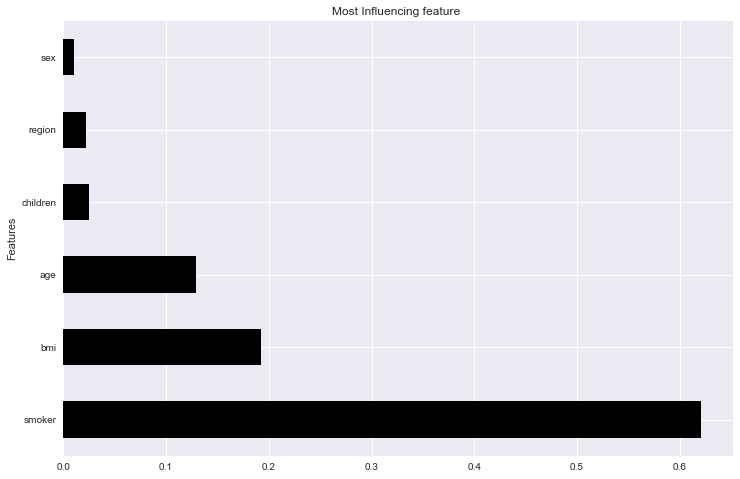

In [88]:
plt.figure(figsize = (12,8))
plt.title("Most Influencing feature ")
plt.ylabel('Features')
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color='black')
plt.show()